In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

## Better visualize the data table
pd.set_option('max_columns', 500)

## For plotting
from itertools import cycle

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

### Upload the dataset

In [2]:
# Load in the dataset
wordle_tweets = pd.read_csv("tweets.csv")

In [3]:
wordle_tweets.shape

(760238, 5)

In [4]:
# Lets view our dataset
wordle_tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


In [5]:
# Lets check out the tweet text of the first id 
print(wordle_tweets['tweet_text'][0])

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


### Data Formatting 
#### Parsing tweet text

In [8]:
wordle_tweets['tweet_datetime'] = pd.to_datetime(wordle_tweets['tweet_date'])

In [9]:
wordle_tweets['tweet_date'] = wordle_tweets['tweet_datetime'].dt.date

In [10]:
wordle_tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime
0,210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00
1,210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00
2,210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00
3,210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00
4,210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00


In [11]:
wordle_tweets['wordle_id'] = wordle_tweets['tweet_text'].str[:10]

In [12]:
wordle_tweets['n_attemps'] = wordle_tweets['tweet_text'].str[11].astype('int')

In [13]:
wordle_tweets['id'] = wordle_tweets['tweet_text'].str[7:10].astype('int')

In [14]:
wordle_tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attemps,id
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210


#### How many tweets do we have for each date

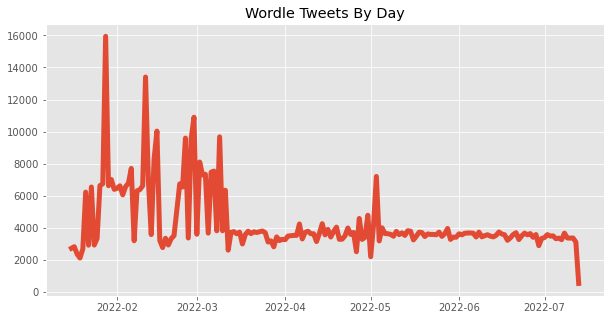

In [16]:
wordle_tweets['tweet_date'].value_counts() \
    .plot(figsize=(10, 5), title="Wordle Tweets By Day", color=color_pal, lw=5)
plt.show()

#### Number of attemps?

In [20]:
wordle_tweets.groupby('wordle_id')['n_attemps'].value_counts() \
    .unstack() \
    .style.background_gradient(axis=1)

n_attemps,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


#### How many attempts does it usually take to solve?

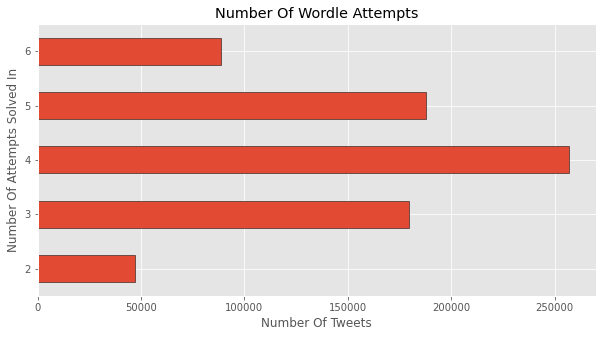

In [25]:
ax = wordle_tweets['n_attemps'].value_counts() \
    .sort_index() \
    .plot(figsize=(10,5),
          kind='barh',
          title="Number Of Wordle Attempts",
          edgecolor='black')
ax.set_xlabel('Number Of Tweets')
ax.set_ylabel("Number Of Attempts Solved In")
plt.show()

#### Parse tweet text

In [26]:
# Make dark squares consistent
wordle_tweets['tweet_text'] = wordle_tweets['tweet_text'].str.replace('⬜','⬛')

In [28]:
n = 1 # Guess Number
wordle_tweets[f'has_guess{n}'] = wordle_tweets['tweet_text'].str.split('\n').str[n+1] \
    .str.contains('|'.join(['🟨','⬛','🟩'])) \
    .fillna(False)
wordle_tweets['has_guess1'].value_counts()

True    760238
Name: has_guess1, dtype: int64

In [29]:
# Parse out the tweet text
wordle_tweets.loc[wordle_tweets[f'has_guess{n}'], f'guess{n}'] = \
    wordle_tweets['tweet_text'].str.split('\n').str[n+1].str[:5]

In [31]:
# Count number correct, misplaced, and incorrect
wordle_tweets.loc[wordle_tweets[f'has_guess{n}'],
                                  f'guess{n}_incorrect'] = wordle_tweets[f'guess{n}'].str.count('⬛')
wordle_tweets.loc[wordle_tweets[f'has_guess{n}'],
                                  f'guess{n}_wrong_spot'] = wordle_tweets[f'guess{n}'].str.count('🟨')
wordle_tweets.loc[wordle_tweets[f'has_guess{n}'],
                                  f'guess{n}_correct'] = wordle_tweets[f'guess{n}'].str.count('🟩')
wordle_tweets.loc[wordle_tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n

In [32]:
def parse_wordle_tweet_text(wordle_tweets):
    for n in range(6):
        n += 1 # Guess Number
        wordle_tweets[f'has_guess{n}'] = wordle_tweets['tweet_text'].str.split('\n').str[n+1] \
            .str.contains('|'.join(['🟨','⬛','🟩'])) \
            .fillna(False)
        
        # Parse out the tweet text
        wordle_tweets.loc[wordle_tweets[f'has_guess{n}'], f'guess{n}'] = \
        wordle_tweets['tweet_text'].str.split('\n').str[n+1].str[:5]
        
        # Count number correct, misplaced, and incorrect
        wordle_tweets.loc[wordle_tweets[f'has_guess{n}'],
                                  f'guess{n}_incorrect'] = wordle_tweets[f'guess{n}'].str.count('⬛')
        wordle_tweets.loc[wordle_tweets[f'has_guess{n}'],
                                  f'guess{n}_wrong_spot'] = wordle_tweets[f'guess{n}'].str.count('🟨')
        wordle_tweets.loc[wordle_tweets[f'has_guess{n}'],
                                  f'guess{n}_correct'] = wordle_tweets[f'guess{n}'].str.count('🟩')
        wordle_tweets.loc[wordle_tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return wordle_tweets

wordle_tweets = parse_wordle_tweet_text(wordle_tweets)

In [35]:
# Keep additional tweet text
wordle_tweets['additional_text'] = \
    wordle_tweets.loc[~wordle_tweets['tweet_text'] \
                  .str.split('\n').str[-1].str.contains('🟩')] \
                  ['tweet_text'].str.split('\n').str[-1]

#### Plot Results By Attemps

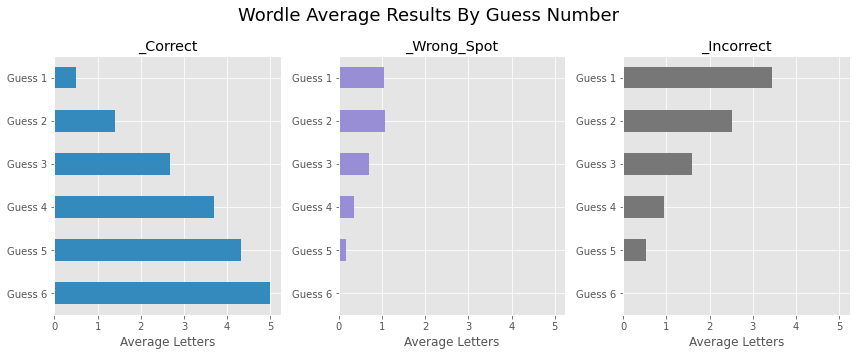

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True)

for i, x in enumerate(['_correct', '_wrong_spot', '_incorrect']):
    col_subset = [c for c in wordle_tweets.columns if x in c]
    guess_avg = wordle_tweets[col_subset].mean()
    guess_avg.index = [f'Guess {i+1}' for i in range(6)]
    guess_avg.sort_index(ascending=False) \
        .plot(kind="barh",
              title=f'{x.strip("-").replace("-"," ").title()}',
              ax=axs[i],
              color=color_pal[i+1])
    axs[i].set_xlabel('Average Letters')
fig.suptitle('Wordle Average Results By Guess Number', fontsize=18)
plt.tight_layout()
plt.show()

#### Letter Analysis 

In [43]:
answer_dict = {
     388 : 'NIGHT',
     387 : 'MADAM',
     386 : 'BERTH',
     385 : 'STEAD',
     384 : 'VOICE',
     383 : 'AGAPE',
     382 : 'FLUFF',
     381 : 'FIELD',
     380 : 'SEVER',
     379 : 'LILAC',
     378 : 'EGRET',
     377 : 'PINTO',
     376 : 'HUTCH',
     375 : 'GAWKY',
     374 : 'DROLL',
     373 : 'RETRO',
     372 : 'RUSTY',
     371 : 'BEADY',
     370 : 'SMITE',
     369 : 'BRINK',
     368 : 'AWFUL',
     367 : 'GLOAT',
     366 : 'INPUT',
     365 : 'LOSER',
     364 : 'CACAO',
     363 : 'BLOWN',
     362 : 'APRON',
     361 : 'PRIMO',
     360 : 'ATONE',
     359 : 'DONOR',
     358 : 'FLOAT',
     357 : 'GOOSE',
     356 : 'PIETY',
     355 : 'GIRTH',
     354 : 'TRAIT',
     353 : 'FLOOD',
     352 : 'GLOOM',
     351 : 'DEPTH',
     350 : 'BROTH',
     349 : 'PHASE',
     348 : 'SHOWY',
     347 : 'CREAK',
     346 : 'MANOR',
     345 : 'ATOLL',
     344 : 'BAYOU',
     343 : 'CREPT',
     342 : 'TIARA',
     341 : 'ASSET',
     340 : 'VOUCH',
     339 : 'ALBUM',
     338 : 'HINGE',
     337 : 'MONEY',
     336 : 'SCRAP',
     335 : 'GAMER',
     334 : 'GLASS',
     333 : 'SCOUR',
     332 : 'BEING',
     331 : 'DELVE',
     330 : 'YIELD',
     329 : 'METAL',
     328 : 'TIPSY',
     327 : 'SLUNG',
     326 : 'FARCE',
     325 : 'GECKO',
     324 : 'SHINE',
     323 : 'CANNY',
     322 : 'MIDST',
     321 : 'BADGE',
     320 : 'HOMER',
     319 : 'TRAIN',
     318 : 'HAIRY',
     317 : 'STORY',
     316 : 'FORGO',
     315 : 'LARVA',
     314 : 'TRASH',
     313 : 'ZESTY',
     312 : 'SHOWN',
     311 : 'HEIST',
     310 : 'ASKEW',
     309 : 'INERT',
     308 : 'OLIVE',
     307 : 'PLANT',
     306 : 'OXIDE',
     305 : 'CARGO',
     304 : 'FOYER',
     303 : 'FLAIR',
     302 : 'AMPLE',
     301 : 'CHEEK',
     300 : 'SHAME',
     299 : 'MINCE',
     298 : 'CHUNK',
     297 : 'ROYAL',
     296 : 'SQUAD',
     295 : 'BLACK',
     294 : 'STAIR',
     293 : 'SCARE',
     292 : 'FORAY',
     291 : 'COMMA',
     290 : 'NATAL',
     289 : 'SHAWL',
     288 : 'FEWER',
     287 : 'TROPE',
     286 : 'SNOUT',
     285 : 'LOWLY',
     284 : 'HARRY',
     283 : 'SHALL',
     282 : 'FOUND',
     281 : 'NYMPH',
     280 : 'EPOXY',
     279 : 'DEPOT',
     278 : 'CHEST',
     277 : 'PURGE',
     276 : 'SLOSH',
     275 : 'THEIR',
     274 : 'RENEW',
     273 : 'ALLOW',
     272 : 'SAUTE',
     271 : 'MOVIE',
     270 : 'CATER',
     269 : 'TEASE',
     268 : 'SMELT',
     267 : 'FOCUS',
     266 : 'TODAY',
     265 : 'WATCH',
     264 : 'LAPSE',
     263 : 'MONTH',
     262 : 'SWEET',
     261 : 'HOARD',
     260 : 'CLOTH',
     259 : 'BRINE',
     258 : 'AHEAD',
     257 : 'MOURN',
     256 : 'NASTY',
     255 : 'RUPEE',
     254 : 'CHOKE',
     253 : 'CHANT',
     252 : 'SPILL',
     251 : 'VIVID',
     250 : 'BLOKE',
     249 : 'TROVE',
     248 : 'THORN',
     247 : 'OTHER',
     246 : 'TACIT',
     245 : 'SWILL',
     244 : 'DODGE',
     243 : 'SHAKE',
     242 : 'CAULK',
     241 : 'AROMA',
     240 : 'CYNIC',
     239 : 'ROBIN',
     238 : 'ULTRA',
     237 : 'ULCER',
     236 : 'PAUSE',
     235 : 'HUMOR',
     234 : 'FRAME',
     233 : 'ELDER',
     232 : 'SKILL',
     231 : 'ALOFT',
     230 : 'PLEAT',
     229 : 'SHARD',
     228 : 'MOIST',
     227 : 'THOSE',
     204 : 'GORGE',
     205 : 'QUERY',
     206 : 'DRINK',
     207 : 'FAVOR',
     208 : 'ABBEY',
     209 : 'TANGY',
     210 : 'PANIC',
     211 : 'SOLAR',
     212 : 'SHIRE',
     213 : 'PROXY',
     214 : 'POINT',
     215 : 'ROBOT',
     216 : 'PRICK',
     217 : 'WINCE',
     218 : 'CRIMP',
     219 : 'KNOLL',
     220 : 'SUGAR',
     221 : 'WHACK',
     222 : 'MOUNT',
     223 : 'PERKY',
     224 : 'COULD',
     225 : 'WRUNG',
     226 : 'LIGHT',
}

wordle_tweets['answer'] = wordle_tweets['id'].map(answer_dict)

In [44]:
first_guess_correct = []
for i, d in wordle_tweets.dropna(subset=['answer']).iterrows():
    example_text = d['guess1']
    example_solution = d['answer']
    results =[x.span()[0] for x in re.finditer('🟩', example_text)]
    first_guess_letters = [example_solution[i] for i in results]
    first_guess_correct += first_guess_letters

In [45]:
first_guess_correct

['I',
 'A',
 'I',
 'A',
 'I',
 'I',
 'P',
 'I',
 'A',
 'A',
 'P',
 'A',
 'I',
 'A',
 'P',
 'P',
 'P',
 'A',
 'N',
 'I',
 'I',
 'A',
 'P',
 'A',
 'A',
 'A',
 'P',
 'A',
 'A',
 'N',
 'I',
 'P',
 'A',
 'N',
 'I',
 'P',
 'A',
 'I',
 'A',
 'I',
 'C',
 'I',
 'A',
 'A',
 'P',
 'A',
 'N',
 'A',
 'A',
 'A',
 'P',
 'A',
 'P',
 'P',
 'A',
 'I',
 'P',
 'P',
 'A',
 'P',
 'A',
 'A',
 'A',
 'P',
 'N',
 'A',
 'N',
 'N',
 'A',
 'N',
 'A',
 'P',
 'P',
 'N',
 'I',
 'P',
 'P',
 'P',
 'A',
 'A',
 'I',
 'I',
 'A',
 'A',
 'I',
 'C',
 'P',
 'A',
 'I',
 'A',
 'A',
 'N',
 'A',
 'P',
 'N',
 'I',
 'P',
 'A',
 'I',
 'A',
 'A',
 'N',
 'A',
 'N',
 'I',
 'I',
 'I',
 'I',
 'P',
 'A',
 'P',
 'P',
 'A',
 'A',
 'P',
 'N',
 'I',
 'N',
 'A',
 'A',
 'I',
 'A',
 'A',
 'A',
 'P',
 'A',
 'A',
 'A',
 'I',
 'I',
 'N',
 'A',
 'I',
 'P',
 'A',
 'N',
 'A',
 'P',
 'A',
 'P',
 'A',
 'N',
 'A',
 'A',
 'I',
 'A',
 'A',
 'A',
 'N',
 'P',
 'P',
 'N',
 'I',
 'P',
 'A',
 'A',
 'N',
 'A',
 'A',
 'N',
 'A',
 'A',
 'A',
 'A',
 'A',
 'P',
 'A'

In [46]:
pd.Series(first_guess_correct).value_counts(ascending=True)

Z       15
Q       17
X       22
V      819
W     1754
G     2564
F     2600
B     2813
K     2839
M     3682
Y     5909
D     6123
P     8053
U     8265
N     9625
C    12335
H    12588
L    13659
I    23515
S    28050
O    29397
T    31233
R    36257
A    62734
E    70665
dtype: int64

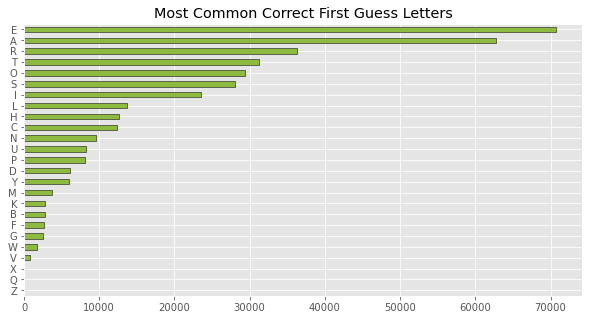

In [47]:
pd.Series(first_guess_correct).value_counts(ascending=True) \
    .plot(kind='barh', figsize=(10, 5),
         title='Most Common Correct First Guess Letters',
         edgecolor='black', color=color_pal[5])
plt.show()